# Proyecto final. Análisis de factores que inciden en la actividad delictiva

## Análisis de estadística descriptiva: ingreso, pobreza y pobreza extrema

Importamos la base de datos:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
np.set_printoptions(precision = 2)

In [16]:
bd = pd.read_csv("base_final.csv")
bd.head()

,ao,clave_ent,edo,homicidio,robocasa,robocalle,robocarro,extorsion,tasa_hom,tasa_rcasa,...,desocupa,edad15a24,edad25a34,edad35a44,edad45mas,pob_tot,pibe,ingreso,pob_ext,pobreza
0,2015,1,Aguascalientes,211,2525,1754,1995,39,15.84,189.59,...,4.577627,255649,211782,175356,296621,1331825,198220.6406,207024.0,2.09,31.58
1,2016,1,Aguascalientes,233,2459,1353,3110,70,17.19,181.43,...,3.973306,258733,217183,178187,308198,1355321,211672.4688,203879.0,2.30,28.22
2,2017,1,Aguascalientes,258,3327,1949,3624,121,18.75,241.83,...,3.599153,260495,222453,180840,320035,1375782,216705.5625,206760.0,2.18,25.99
3,2018,1,Aguascalientes,283,3355,2216,3309,138,20.28,240.36,...,3.626284,261963,227600,183553,331996,1395794,224807.4688,222261.0,1.17,26.18
4,2019,1,Aguascalientes,269,2817,1780,2399,116,19.00,199.02,...,3.532177,263225,232527,186443,344052,1415421,223622.4844,NaN,NaN,NaN


Exploramos a detalle la base de datos

In [17]:
bd.shape

(160, 23)

Tenemos 160 renglones y 23 columnas. Las varibles en las columnas son:

In [18]:
bd.columns

Index(['ao', 'clave_ent', 'edo', 'homicidio', 'robocasa', 'robocalle',
       'robocarro', 'extorsion', 'tasa_hom', 'tasa_rcasa', 'tasa_rcalle',
       'tasa_rcarro', 'tasa_extor', 'desocupa', 'edad15a24', 'edad25a34',
       'edad35a44', 'edad45mas', 'pob_tot', 'pibe', 'ingreso', 'pob_ext',
       'pobreza'],
      dtype='object')

In [19]:
bd.describe(include="all")

,ao,clave_ent,edo,homicidio,robocasa,robocalle,robocarro,extorsion,tasa_hom,tasa_rcasa,...,desocupa,edad15a24,edad25a34,edad35a44,edad45mas,pob_tot,pibe,ingreso,pob_ext,pobreza
count,160.000000,160.000000,160,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,128.000000,128.000000,128.000000
unique,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Tamaulipas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2017.000000,16.500000,NaN,1230.825000,2701.98125,2454.343750,5914.500000,198.181250,34.348250,92.510375,...,3.602700,6.855021e+05,6.187375e+05,5.260511e+05,1.004019e+06,3.875842e+06,5.391530e+05,185299.796875,6.985859,41.128516
std,1.418654,9.262082,NaN,945.839998,2300.18593,4721.687582,8838.664012,311.248164,20.720682,87.032577,...,1.114326,5.583670e+05,5.224428e+05,4.565163e+05,8.838526e+05,3.217754e+06,5.618525e+05,54779.270982,7.217705,14.972258
min,2015.000000,1.000000,NaN,84.000000,80.00000,0.000000,221.000000,0.000000,3.900000,6.520000,...,1.279218,1.290150e+05,1.190830e+05,1.004100e+05,1.644870e+05,7.198460e+05,9.558523e+04,96910.000000,0.470000,12.890000
25%,2016.000000,8.750000,NaN,460.250000,1314.75000,181.250000,1515.250000,24.750000,20.145000,33.562500,...,2.790710,3.218815e+05,2.879238e+05,2.341340e+05,4.308870e+05,1.757316e+06,2.283873e+05,149374.750000,2.440000,28.745000
50%,2017.000000,16.500000,NaN,1000.500000,2349.00000,819.500000,3421.500000,116.000000,27.825000,65.875000,...,3.543905,5.310785e+05,4.696965e+05,4.113720e+05,7.893785e+05,3.026771e+06,3.835130e+05,181618.000000,4.360000,40.015000
75%,2018.000000,24.250000,NaN,1761.250000,3112.75000,1765.000000,5461.500000,198.250000,42.885000,116.817500,...,4.201930,8.681305e+05,7.657412e+05,6.139250e+05,1.156226e+06,4.895339e+06,5.778418e+05,215024.250000,7.825000,50.660000


**En esta sección** el análisis se enfocará en analizar **la evolución y características** de las variables de:

- Ingreso promedio de los hogares (_ingreso_)
- Porcentaje de población que se encuentra en situación de pobreza (_pobreza_)
- Porcentaje de población que se encuentra en situación de pobreza extrema (_pob_ext_)
    
para cada una de las entidades federativas, durante el periodo 2015-2018.

Para ello, se trabajará con un subcojunto de la base de datos original que contenga solo las variables de interés, y a la cual se le aplicarán las manipulaciones necesarias para el análisis.

In [20]:
bd_cbp=bd.drop(["homicidio", "robocasa", "robocalle",
       "robocarro", "extorsion", "desocupa", "edad15a24", "edad25a34",
       "edad35a44", "edad45mas", "pob_tot", "pibe"],axis=1)
bd_cbp.tail()

,ao,clave_ent,edo,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
155,2015,32,Zacatecas,22.29,55.88,3.12,138.73,5.68,141364.0,4.63,50.94
156,2016,32,Zacatecas,37.67,32.72,2.16,138.74,5.01,150466.0,3.52,49.00
157,2017,32,Zacatecas,42.34,43.38,3.80,124.92,11.54,153315.0,2.93,47.34
158,2018,32,Zacatecas,42.62,42.44,3.35,119.76,14.31,140328.0,3.37,46.76
159,2019,32,Zacatecas,40.25,36.50,2.30,103.41,20.49,NaN,NaN,NaN


In [21]:
i = bd_cbp[(bd_cbp.ao == 2019)].index
bd_cbp=bd_cbp.drop(i,axis=0)
bd_cbp.tail()

,ao,clave_ent,edo,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
153,2018,31,Yucatan,3.99,63.17,4.08,13.63,0.23,191822.0,6.66,40.80
155,2015,32,Zacatecas,22.29,55.88,3.12,138.73,5.68,141364.0,4.63,50.94
156,2016,32,Zacatecas,37.67,32.72,2.16,138.74,5.01,150466.0,3.52,49.00
157,2017,32,Zacatecas,42.34,43.38,3.80,124.92,11.54,153315.0,2.93,47.34
158,2018,32,Zacatecas,42.62,42.44,3.35,119.76,14.31,140328.0,3.37,46.76


### Ingreso promedio de los hogares por entidad federativa

Visualizamos la evolución del ingreso promedio durante el periodo 2015-2018 para cada entidad federativa

In [22]:
anios=["2015","2016","2017","2018"]
anios

['2015', '2016', '2017', '2018']

A través de un loop generamos un diccionario que contiene los datos para cada entidad. Esto facilitará la visualización:

In [23]:
num_edo=np.arange(1,33,1)
num_edo

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [24]:
ent={}
for i in np.arange(1,33,1):
    ent[i]=bd_cbp.groupby("clave_ent").get_group(i)
    ent[i]=ent[i].reset_index(drop=True)

In [25]:
## mostramos ejemplo de un Estado en particular
ent[18]

,ao,clave_ent,edo,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
0,2015,18,Nayarit,12.30,37.89,0.0,21.92,0.08,176238.0,7.79,38.23
1,2016,18,Nayarit,6.92,17.87,0.0,18.19,0.41,177662.0,7.93,37.53
2,2017,18,Nayarit,23.43,7.46,0.0,22.70,0.08,178449.0,7.69,36.88
3,2018,18,Nayarit,35.61,6.71,0.0,73.30,0.32,178553.0,5.88,34.77


Generamos gráfica que contiene la evolución del ingreso anual promedio de los hogares en cada entidad federativa:

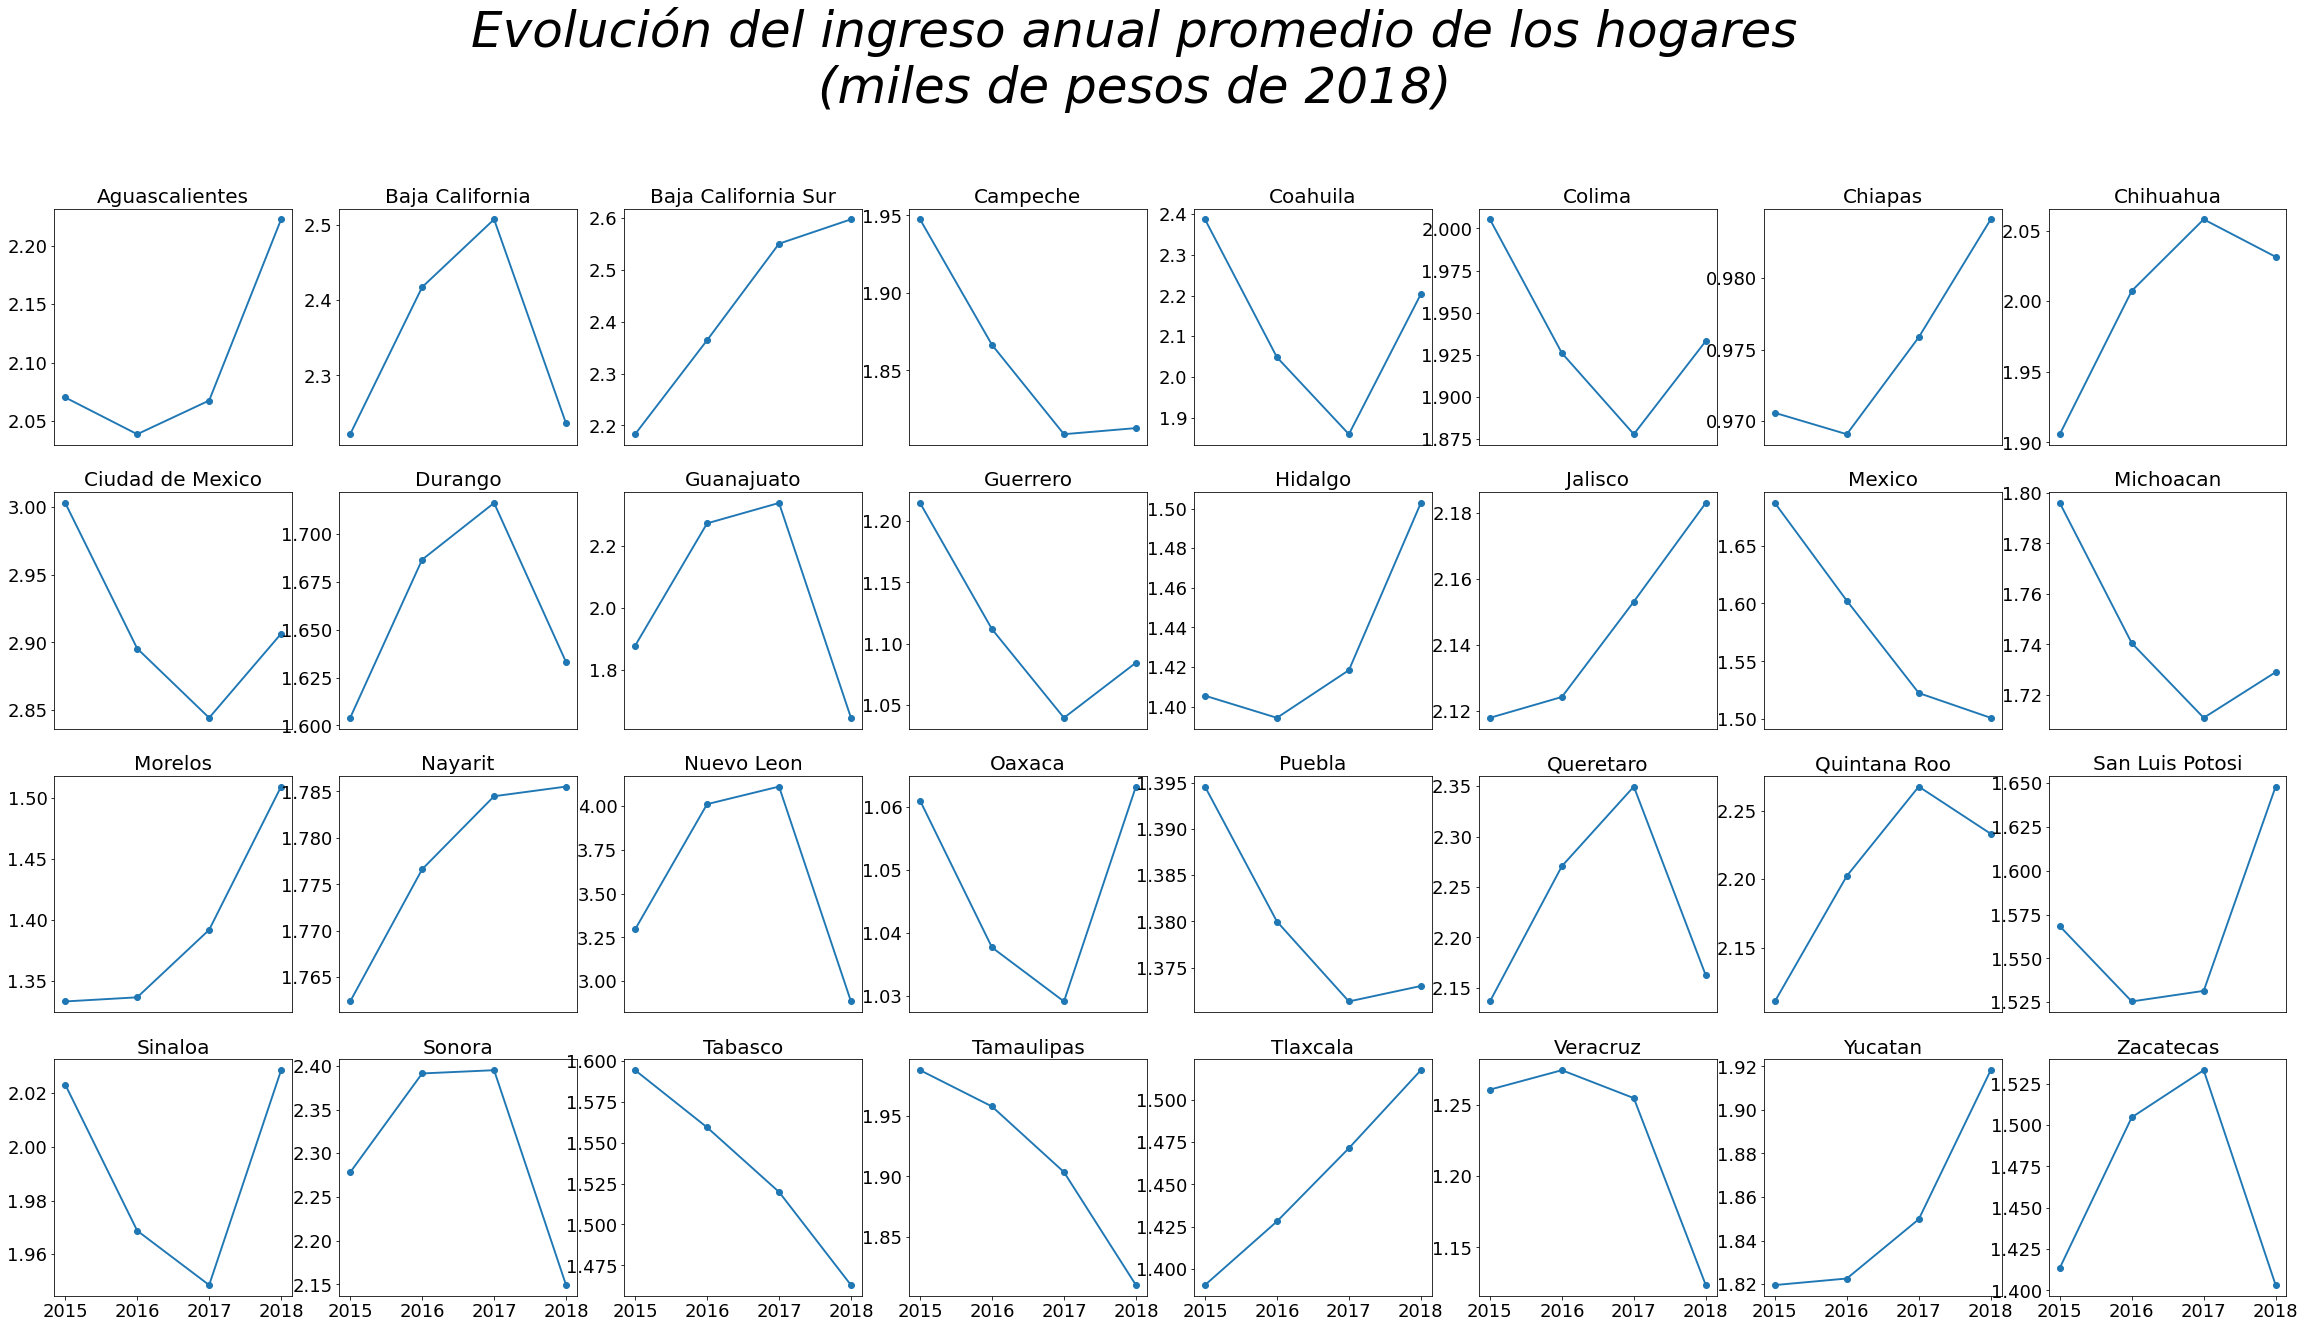

In [30]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(anios, ent[i].ingreso/100000, marker="o", linewidth=1.9)
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    # Not ticks everywhere
    if num < 25 :
        plt.xticks([])
   
      

plt.suptitle("Evolución del ingreso anual promedio de los hogares\n(miles de pesos de 2018)",fontsize=50, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

Como puede observarse, la evolución del ingreso real de los hogares no fue homogeneo en las entidades del país durante 2015-2018. En Estados como Aguascalientes, Chiapas, Jalisco, Puebla, Tlaxcala o Yucatán el ingreso real se incrementó sostenidamente durante el periodo.

En contraste, los hogares que habitan en entidades como Campeche, Coahuila, Colima, Ciudad de México, Estado de México, Nuevo León, Sonora, Veracruz, entre otras, vieron disminuidos sus ingresos durante 2015-2018.

Por otro lado, en algunas entidades, el nivel de ingreso de los hogares observado en 2018 se ubicó en niveles muy similares a los observados en 2015, en términos reales. Tal es el caso de Estados como Baja California, Querétaro, Sinaloa y Zacatecas. No obstante, el comportamiento intermedio difiere. Por ejemplo, en Sinaloa, el ingreso anual disminuyó en 2016 y 2017 de manera importante y en 2018 se recuperó a un nivel similar al de 2015; mientras que en Baja California se observó el comportamiento inverso: después de registrarse un crecimiento del ingreso en 2016 y 2017, la caída en el ingreso de 2018 significó que éste retrocediera al nivel observado 3 años antes.


### Pobreza

Asimismo, observamos la evolución del porcentaje de población en situación de pobreza durante el periodo 2015-2018 para cada entidad federativa:

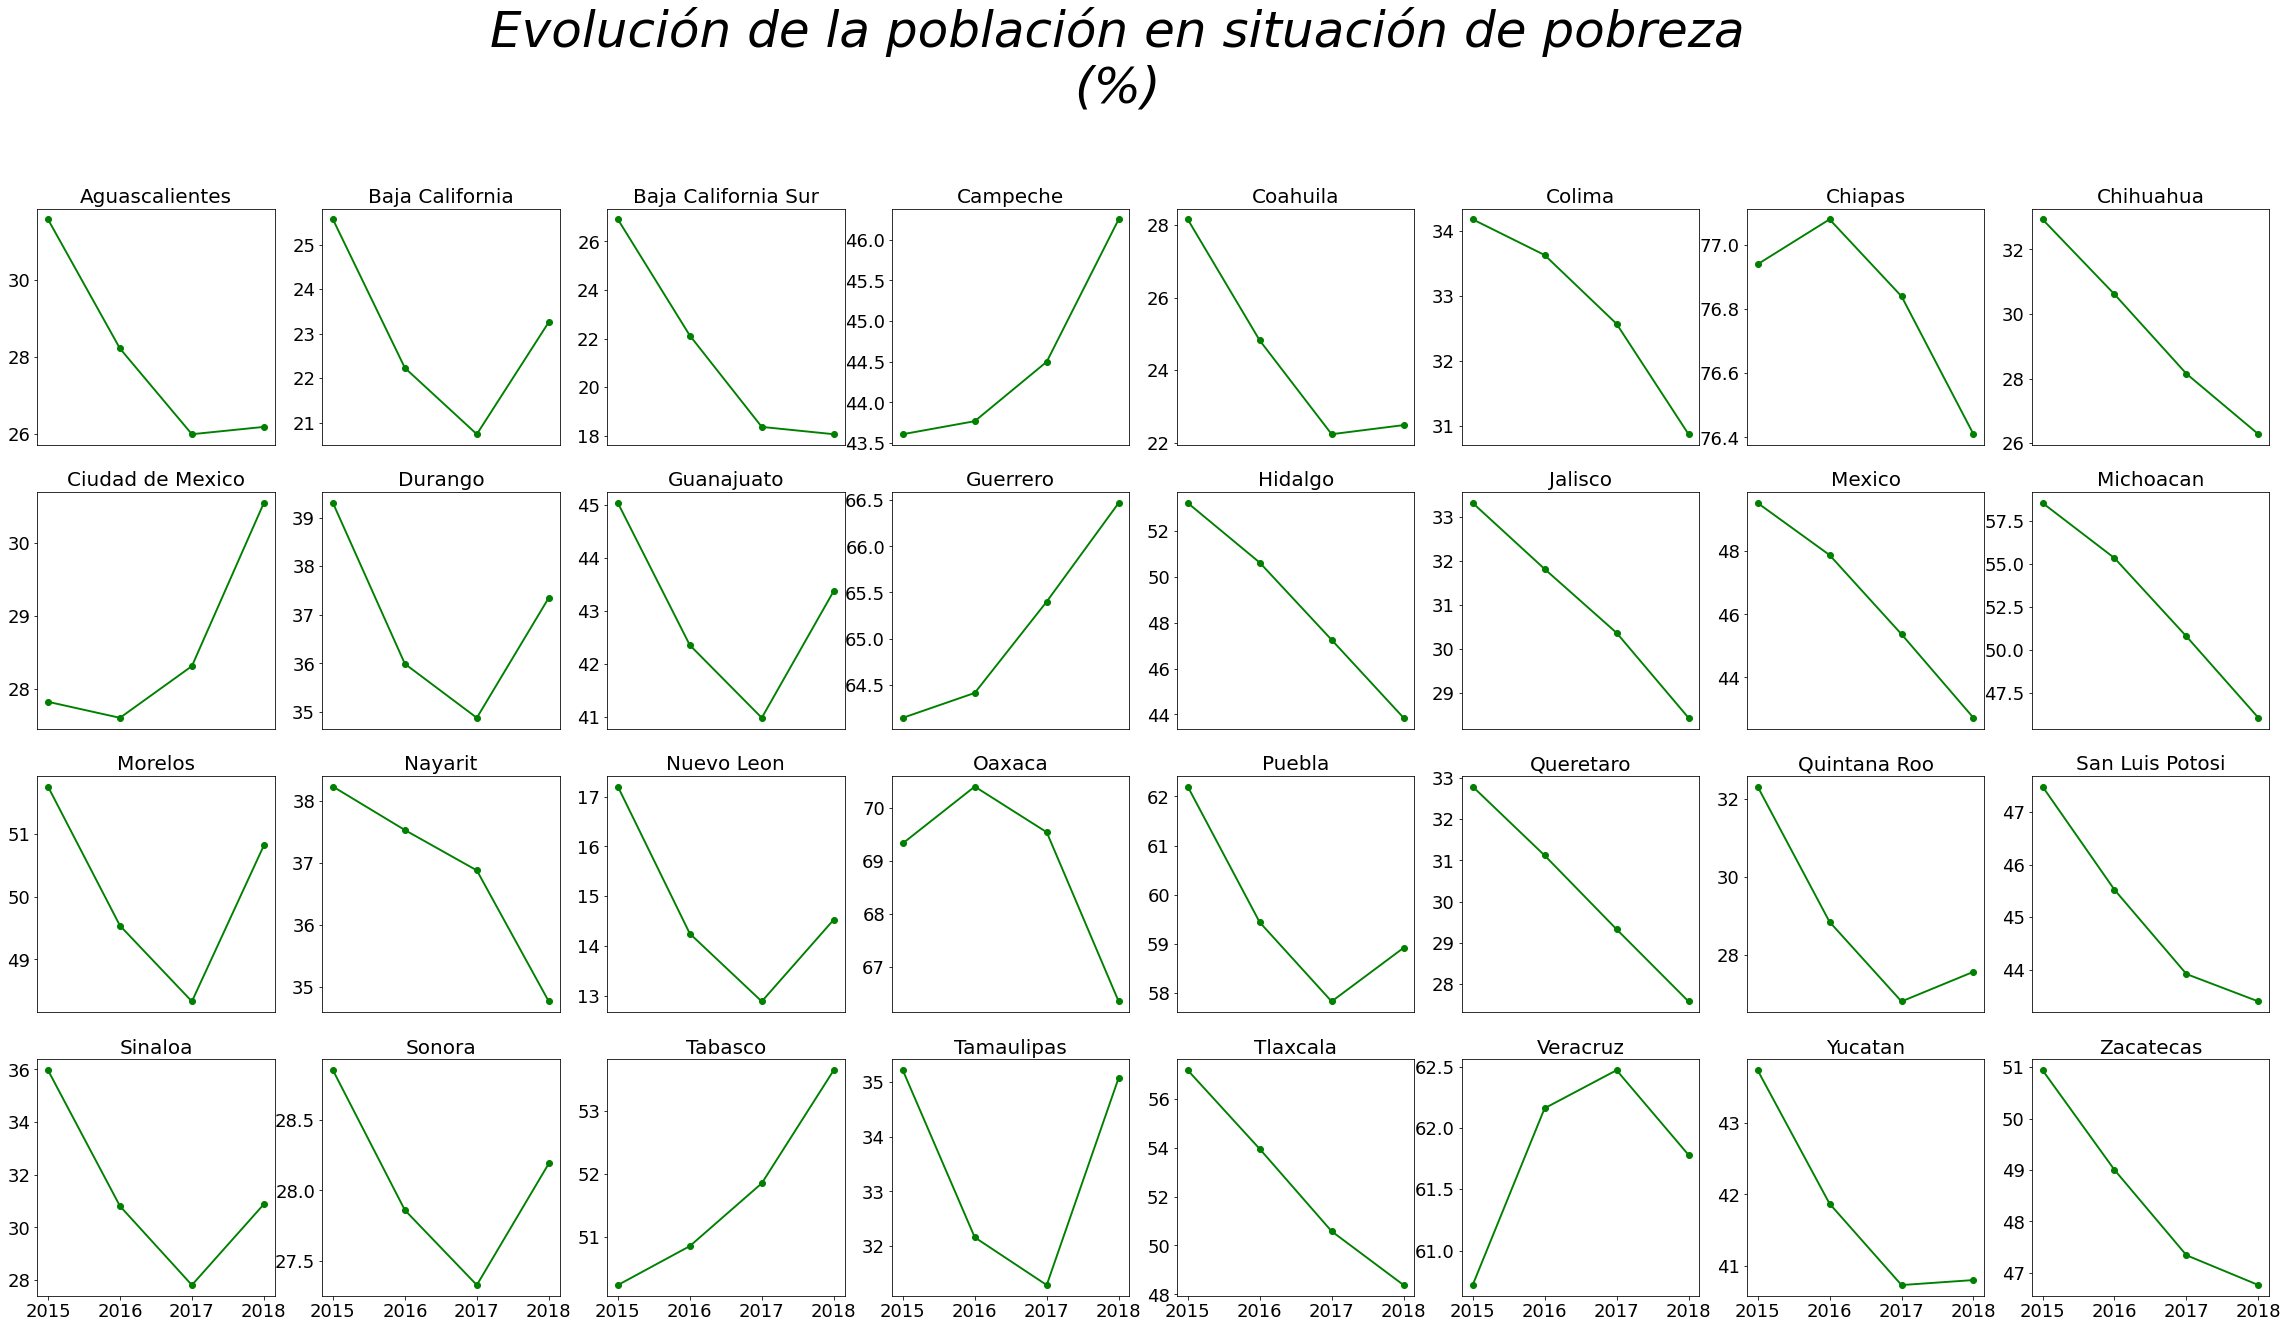

In [31]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(anios, ent[i].pobreza, marker="o", color="g", linewidth=1.9)
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    # Not ticks everywhere
    if num < 25 :
        plt.xticks([])
   

        

plt.suptitle("Evolución de la población en situación de pobreza\n(%)",fontsize=50, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

Se observa que, durante el periodo de análisis, 26 de las 32 entidades disminuyeron el porcentaje de pobreza. De las cuales destacan por haber disminuido la pobreza consistentemente cada año:

- Baja California Sur
- Colima
- Chihuahua 
- Hidalgo
- Jalisco
- Estado de México
- Michoacán
- Nayarit
- Oaxaca
- Querétaro
- San Luis Potosí
- Tlaxcala
- Zacatecas

En contraste, las entidades donde aumentó el nivel de pobreza fueron:

- Campeche
- Ciudad de México
- Guerrero
- Tabasco
- Veracruz

Mientas que en Tamaulipas se mantuvo prácticamente constante.


### Pobreza extrema

Durante 2015-2018, la pobreza extrema en las entidades federativas evolucionó de la siguiente forma:

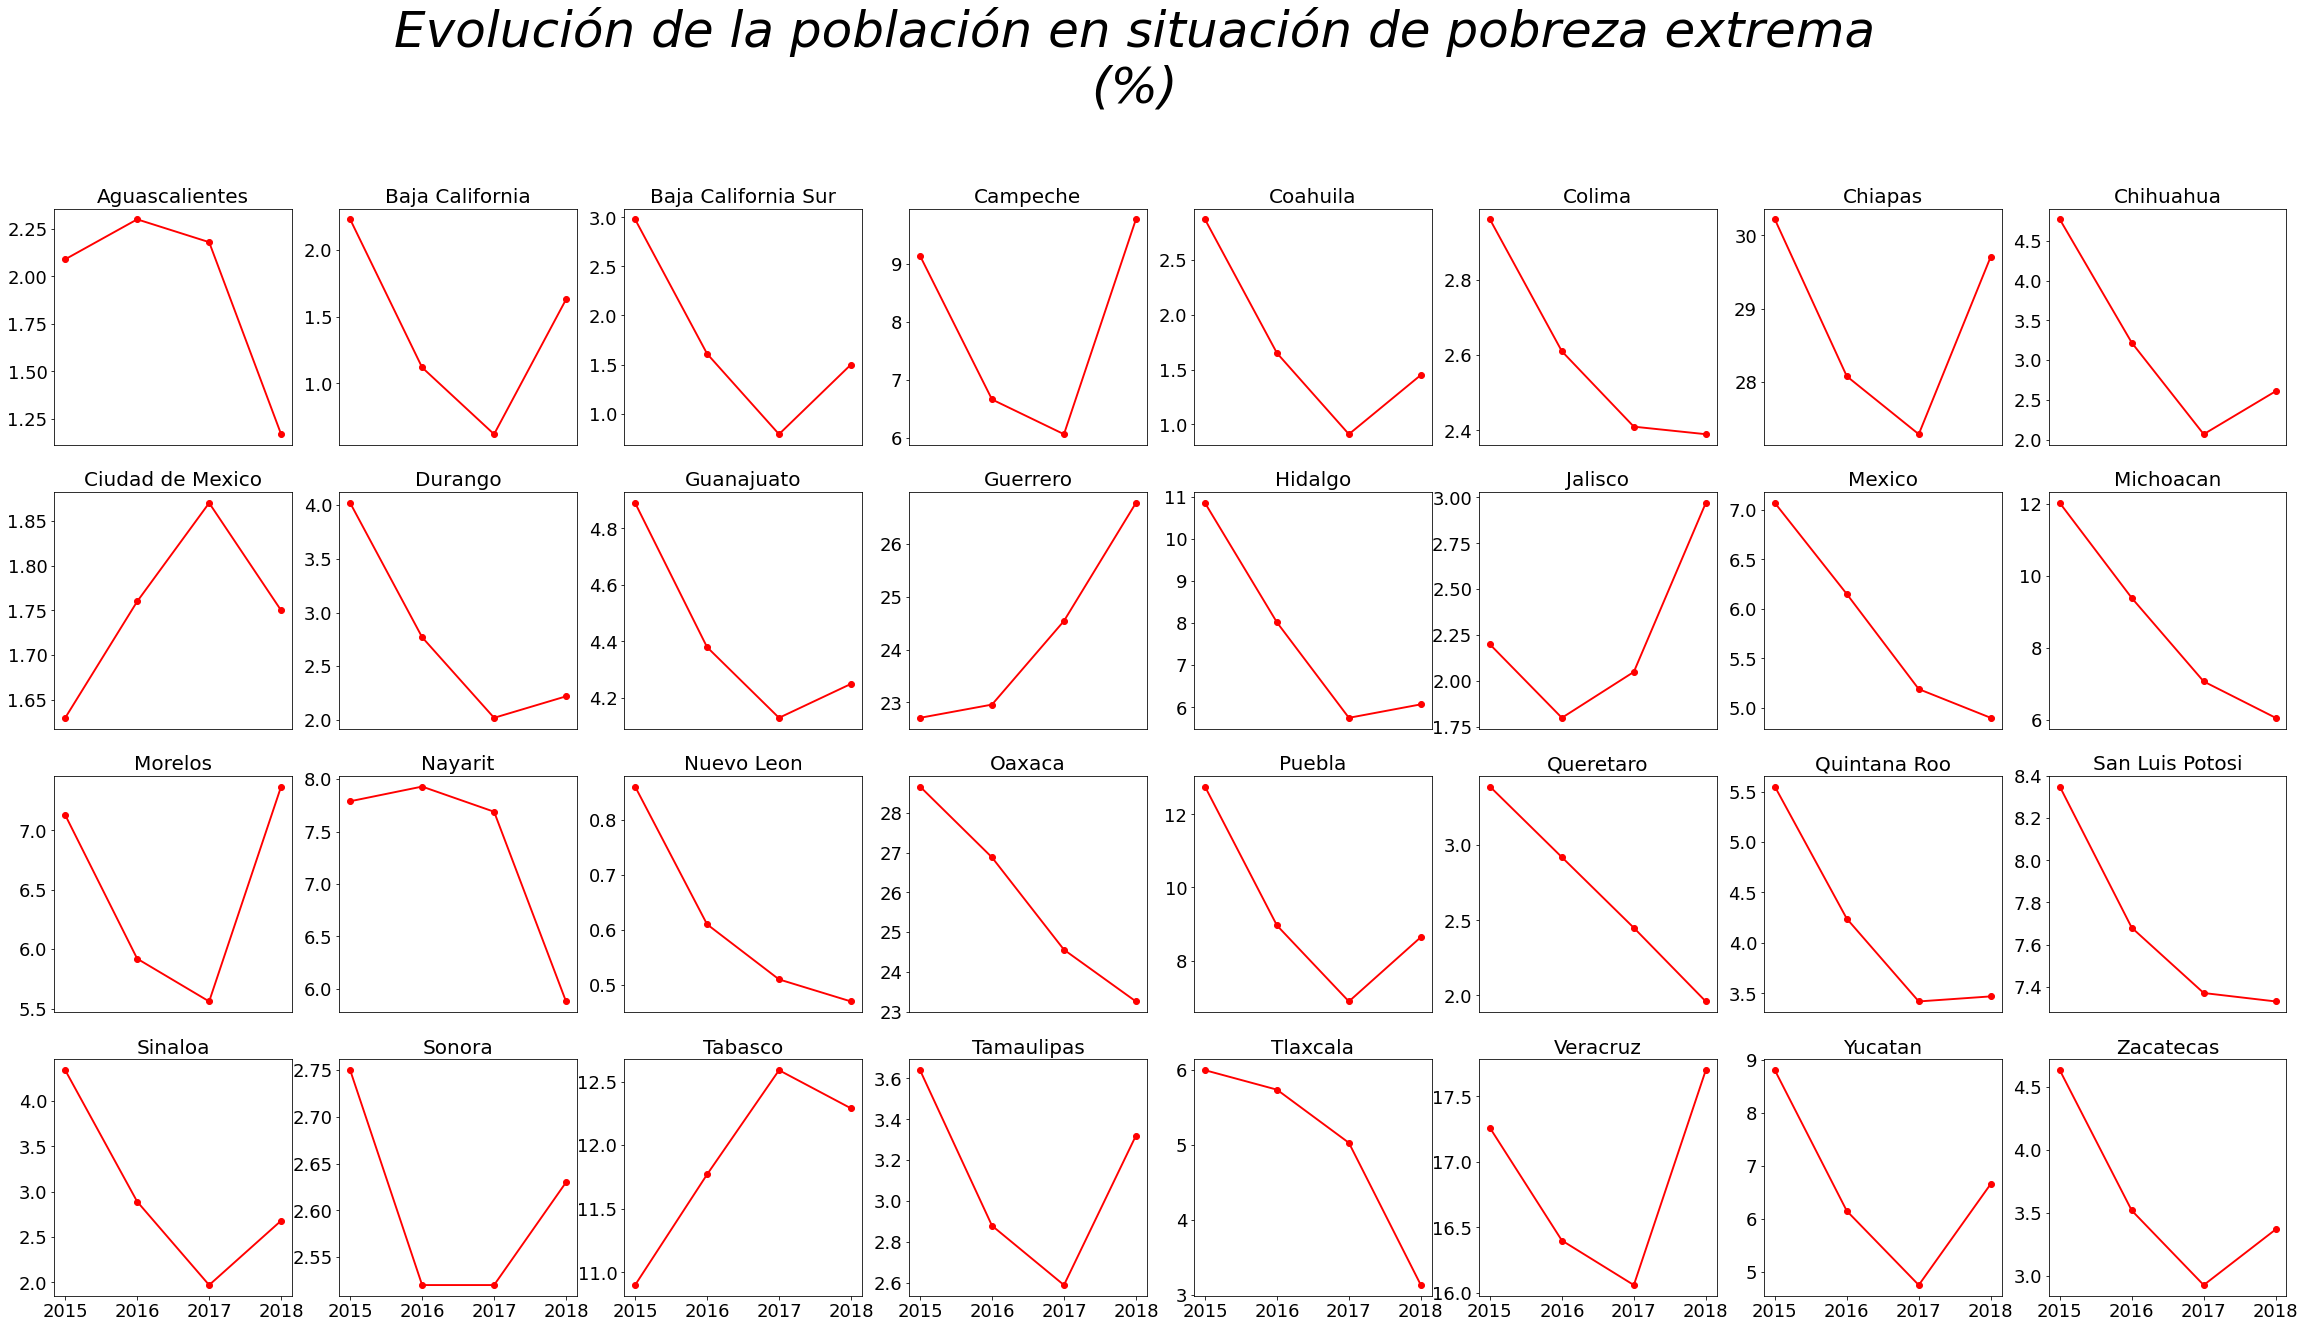

In [33]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(anios, ent[i].pob_ext, marker="o", color="r", linewidth=1.9)
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    # Not ticks everywhere
    if num < 25 :
        plt.xticks([])
   

        

plt.suptitle("Evolución de la población en situación de pobreza extrema\n(%)",fontsize=50, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

Por su parte, 7 de las 32 entidades federativas registraron un aumento en el porcentaje de población en situación de pobreza extrema:
    
- Campeche
- Ciudad de México
- Guerrero
- Jalisco
- Morelos
- Tabasco
- Veracruz

Destaca que, en Jalisco y Morelos la pobreza extrema aumentó a pesar de que el porcentaje de pobreza disminuyó.  
 
  
   
    
     
      
       
        
        

**A continuación,** analizaremos el comportamiento de **cada variable por entidad**. Para ello, calculamos el promedio observado en el periodo:

In [34]:
bdprom=bd_cbp.groupby(["clave_ent","edo"]).mean()
bdprom.head()

,,ao,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
clave_ent,edo,,,,,,,,,
1,Aguascalientes,2016.5,18.0150,213.3025,132.9875,219.9350,6.6925,209981.00,1.9350,27.9925
2,Baja California,2016.5,60.1500,295.3250,165.9075,488.3125,5.3175,234557.00,1.4000,22.9500
3,Baja California Sur,2016.5,47.0875,356.1550,3.6225,192.6125,20.3600,242372.25,1.7200,21.3700
4,Campeche,2016.5,15.4300,11.6950,6.9450,51.4475,2.4525,185888.50,7.9075,44.5325
5,Coahuila,2016.5,16.0475,86.1200,44.2500,34.6425,0.9225,212467.50,1.7200,24.4250


In [35]:
bdprom=bdprom.drop("ao",axis=1)
bdprom.tail()

,,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
clave_ent,edo,,,,,,,,
28,Tamaulipas,43.1850,83.1925,7.8775,146.9400,4.2400,191478.25,3.1075,33.4325
29,Tlaxcala,22.3200,53.9075,24.5425,138.3275,0.3400,145182.50,4.9750,52.5200
30,Veracruz,23.7725,27.3250,17.4400,98.8675,4.4900,122842.75,16.8550,61.7825
31,Yucatan,4.4700,82.0675,7.8500,16.2175,1.8925,185255.75,6.5925,41.7850
32,Zacatecas,36.2300,43.6050,3.1075,130.5375,9.1350,146368.25,3.6125,48.5100


Utilizando el promedio de cada variable durante los años 2015-2018, graficamos:

In [36]:
#creamos dataframe auxiliar para ordenar los valores
bdprom_ord_ing = bdprom.sort_values("ingreso",ascending=False)
bdprom_ord_ing.head()

,,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
clave_ent,edo,,,,,,,,
19,Nuevo Leon,21.2725,57.7350,30.8825,43.3725,11.0100,357570.25,0.6125,14.7175
9,Ciudad de Mexico,19.2750,71.9125,193.2575,136.4700,6.2775,291225.50,1.7525,28.5700
3,Baja California Sur,47.0875,356.1550,3.6225,192.6125,20.3600,242372.25,1.7200,21.3700
2,Baja California,60.1500,295.3250,165.9075,488.3125,5.3175,234557.00,1.4000,22.9500
26,Sonora,36.9950,49.6275,6.8975,137.3350,1.7650,230347.75,2.6050,28.0575


In [37]:
bdprom_ord_ing["nombre_ent"] = bdprom_ord_ing.index
bdprom_ord_ing.head()

,,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza,nombre_ent
clave_ent,edo,,,,,,,,,
19,Nuevo Leon,21.2725,57.7350,30.8825,43.3725,11.0100,357570.25,0.6125,14.7175,"(19, Nuevo Leon)"
9,Ciudad de Mexico,19.2750,71.9125,193.2575,136.4700,6.2775,291225.50,1.7525,28.5700,"(9, Ciudad de Mexico)"
3,Baja California Sur,47.0875,356.1550,3.6225,192.6125,20.3600,242372.25,1.7200,21.3700,"(3, Baja California Sur)"
2,Baja California,60.1500,295.3250,165.9075,488.3125,5.3175,234557.00,1.4000,22.9500,"(2, Baja California)"
26,Sonora,36.9950,49.6275,6.8975,137.3350,1.7650,230347.75,2.6050,28.0575,"(26, Sonora)"


In [38]:
#variable posicional para eje x
ypos=np.arange(len(bdprom_ord_ing))
ypos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

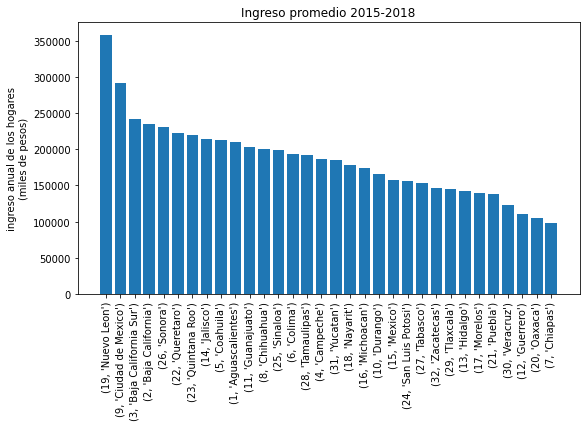

In [39]:
plt.rcParams["figure.figsize"] = [9,5]
plt.bar(ypos,bdprom_ord_ing["ingreso"])
plt.xticks(ypos,bdprom_ord_ing["nombre_ent"],rotation=90)
plt.ylabel("ingreso anual de los hogares\n(miles de pesos)")
plt.title("Ingreso promedio 2015-2018")
plt.show()

De esta manera, observamos que en promedio, Nuevo León registró el nivel de ingreso más elevado en 2015-2018, mientras que los hogares de Chiapas registraron el menor nivel.

In [40]:
bdprom_ord_pob = bdprom.sort_values("pobreza",ascending=False)
bdprom_ord_pob["nombre_ent"] = bdprom_ord_pob.index
ypos=np.arange(len(bdprom_ord_pob))

En sentido inverso, Nuevo León es el estado que registró un menor nivel de pobreza en el promedio de 2015-2018, y Chiapas la entidad con mayor porcentaje de pobreza (cerca del 80% de su población vive en situación de pobrezs).

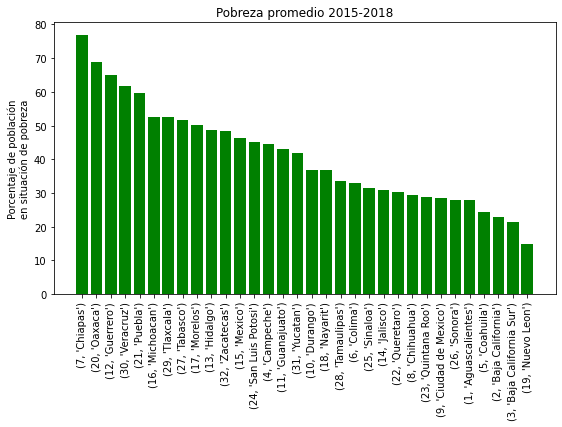

In [80]:
plt.rcParams["figure.figsize"] = [9,5]
plt.bar(ypos,bdprom_ord_pob["pobreza"],color="g")
plt.xticks(ypos,bdprom_ord_pob["nombre_ent"],rotation=90)
plt.ylabel("Porcentaje de población\nen situación de pobreza")
plt.title("Pobreza promedio 2015-2018")
plt.show()

In [42]:
bdprom_ord_pobe = bdprom.sort_values("pob_ext",ascending=False)
bdprom_ord_pobe["nombre_ent"] = bdprom_ord_pobe.index
ypos=np.arange(len(bdprom_ord_pobe))

Las entidades con mayor nivel de pobreza extrema en promedio durante 2015-2018 se ven como sigue:

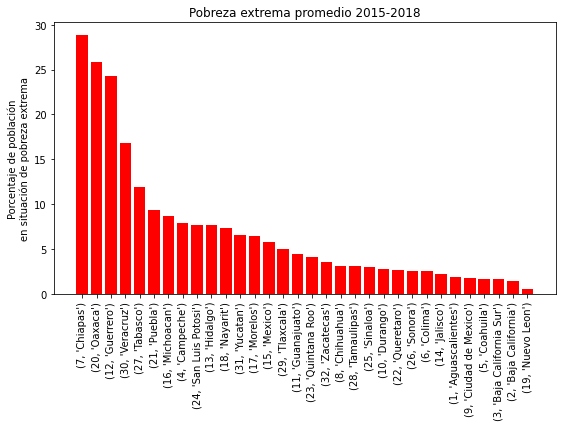

In [81]:
plt.rcParams["figure.figsize"] = [9,5]
plt.bar(ypos,bdprom_ord_pobe["pob_ext"],color="r")
plt.xticks(ypos,bdprom_ord_pobe["nombre_ent"],rotation=90)
plt.ylabel("Porcentaje de población\nen situación de pobreza extrema")
plt.title("Pobreza extrema promedio 2015-2018")
plt.show()


Asimismo, podemos observar las **medidas de tendencia central** para el ingreso medio de 2015-2018 en las entidades del país.




In [44]:
bdprom["ingreso"].describe()

count        32.000000
mean     185299.796875
std       53965.713172
min       97490.750000
25%      146071.812500
50%      185572.125000
75%      212965.750000
max      357570.250000
Name: ingreso, dtype: float64

Se observa, entonces, que el ingreso anual promedio de los hogares mexicanos durante el periodo 2015-2018 fue de 185,300 pesos de 2018, muy similar al valor de la mediana (185,572 pesos constantes). Parecería ser que el ingreso medio es insesgado.

Se observa la distribución del ingreso medio en el siguiente histograma:

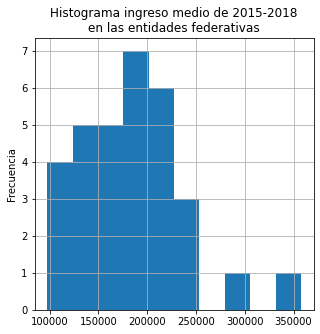

In [84]:
plt.rcParams["figure.figsize"] = [5,5]
bdprom["ingreso"].hist(bins=10)
plt.title("Histograma ingreso medio de 2015-2018\nen las entidades federativas")
plt.ylabel("Frecuencia")
plt.show()

Para la **pobreza** promedio observada en 2015-2018 se tiene:

In [47]:
bdprom["pobreza"].describe()

count    32.000000
mean     41.128516
std      15.004491
min      14.717500
25%      29.341250
50%      39.332500
75%      50.495625
max      76.817500
Name: pobreza, dtype: float64

y se distribuye:

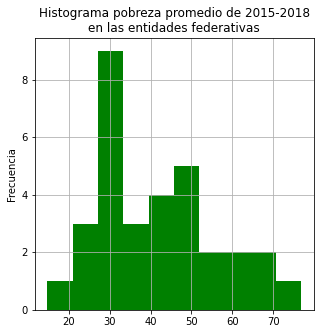

In [85]:
bdprom["pobreza"].hist(bins=10,color="g")
plt.title("Histograma pobreza promedio de 2015-2018\nen las entidades federativas")
plt.ylabel("Frecuencia")
plt.show()

y para el porcentaje de población en **pobreza extrema**:

In [51]:
bdprom["pob_ext"].describe()

count    32.000000
mean      6.985859
std       7.221645
min       0.612500
25%       2.601875
50%       4.291250
75%       7.738750
max      28.825000
Name: pob_ext, dtype: float64

Observamos, que la media es mayor a la mediana, por lo que podríamos esperar que la distribución esté sesgada a la derecha:

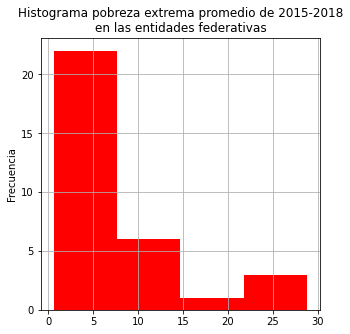

In [86]:
bdprom["pob_ext"].hist(bins="scott",color="r")
plt.title("Histograma pobreza extrema promedio de 2015-2018\nen las entidades federativas")
plt.ylabel("Frecuencia")
plt.show()

**Realizamos el mismo análisis de medidas de tendencia central para el total de las observaciones (todos los años) de las variables:**

- Ingreso
- Pobreza
- Pobreza extrema

In [53]:
bd_cbp["ingreso"].describe()

count       128.000000
mean     185299.796875
std       54779.270982
min       96910.000000
25%      149374.750000
50%      181618.000000
75%      215024.250000
max      411233.000000
Name: ingreso, dtype: float64

Se aprecia mejor el sesgo hacia la derecha. Visualizamos con el histograma:

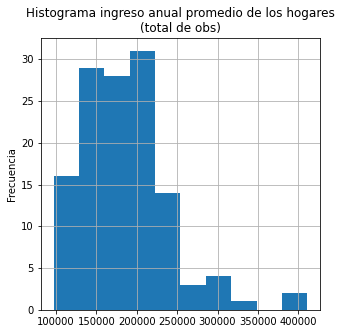

In [87]:
bd_cbp["ingreso"].hist(bins=10)
plt.title("Histograma ingreso anual promedio de los hogares\n(total de obs)")
plt.ylabel("Frecuencia")
plt.show()

para **pobreza**:

In [55]:
bd_cbp["pobreza"].describe()

count    128.000000
mean      41.128516
std       14.972258
min       12.890000
25%       28.745000
50%       40.015000
75%       50.660000
max       77.080000
Name: pobreza, dtype: float64

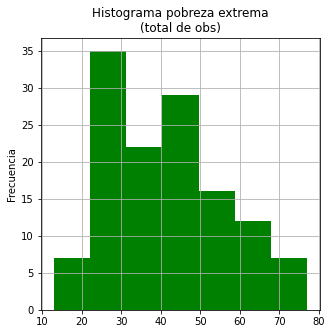

In [88]:
bd_cbp["pobreza"].hist(bins="scott",color="g")
plt.title("Histograma pobreza extrema\n(total de obs)")
plt.ylabel("Frecuencia")
plt.show()

y para **pobreza extrema**:

In [57]:
bd_cbp["pob_ext"].describe()

count    128.000000
mean       6.985859
std        7.217705
min        0.470000
25%        2.440000
50%        4.360000
75%        7.825000
max       30.220000
Name: pob_ext, dtype: float64

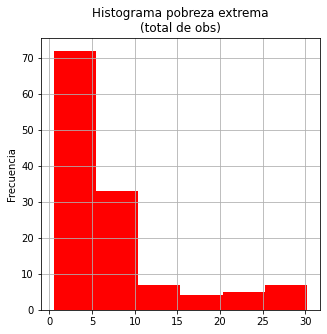

In [89]:
bd_cbp["pob_ext"].hist(bins="scott",color="r")
plt.title("Histograma pobreza extrema\n(total de obs)")
plt.ylabel("Frecuencia")
plt.show()

Por último, nos interesa conocer si es posible **identificar "a simple vista" posibles relaciones entre cada uno de los cinco delitos y las variables de ingreso, pobreza y pobreza extrema**, respectivamente:

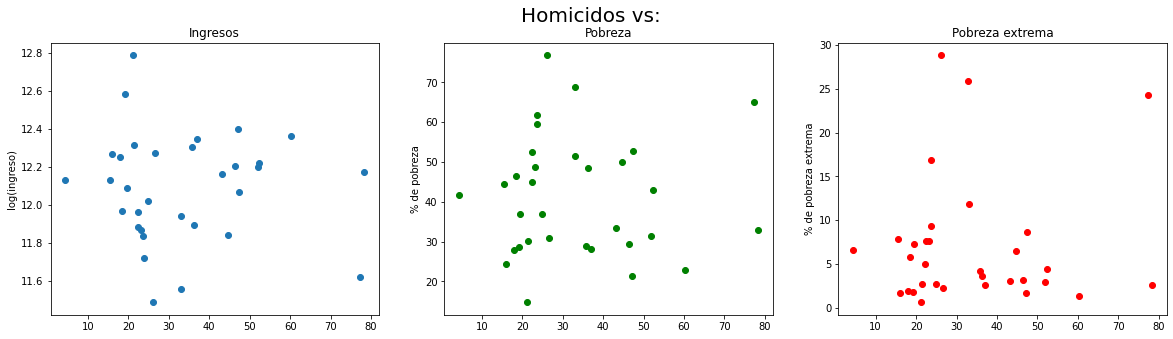

In [90]:
plt.rcParams["figure.figsize"] = [20,5]

plt.subplot(1,3,1)
plt.scatter(bdprom["tasa_hom"],np.log(bdprom["ingreso"]))
plt.ylabel("log(ingreso)")
plt.title("Ingresos")
plt.subplot(1,3,2)
plt.scatter(bdprom["tasa_hom"],bdprom["pobreza"],color="g")
plt.ylabel("% de pobreza")
plt.title("Pobreza")
plt.subplot(1,3,3)
plt.scatter(bdprom["tasa_hom"],bdprom["pob_ext"],color="r")
plt.ylabel("% de pobreza extrema")
plt.title("Pobreza extrema")

plt.suptitle("Homicidos vs:",fontsize=20)
plt.show()

A simple vista, no parece haber una clara relación entre los homicidios y las variables de ingreso y pobreza

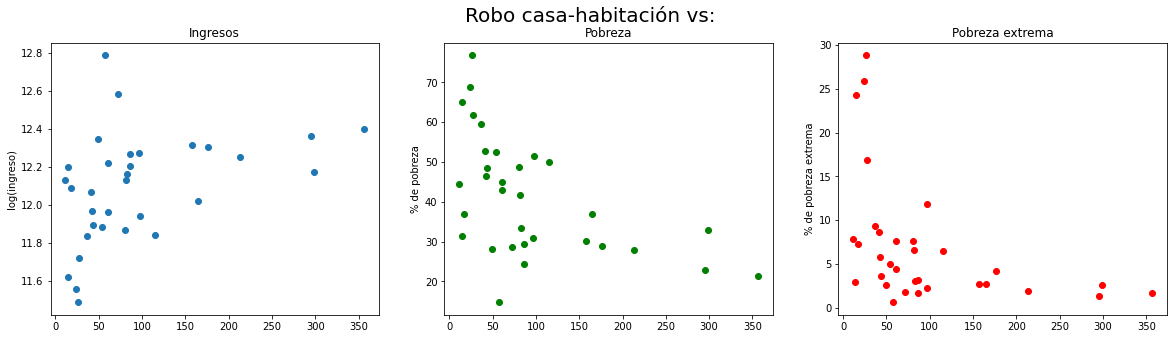

In [91]:
plt.subplot(1,3,1)
plt.scatter(bdprom["tasa_rcasa"],np.log(bdprom["ingreso"]))
plt.ylabel("log(ingreso)")
plt.title("Ingresos")
plt.subplot(1,3,2)
plt.scatter(bdprom["tasa_rcasa"],bdprom["pobreza"],color="g")
plt.ylabel("% de pobreza")
plt.title("Pobreza")
plt.subplot(1,3,3)
plt.scatter(bdprom["tasa_rcasa"],bdprom["pob_ext"],color="r")
plt.ylabel("% de pobreza extrema")
plt.title("Pobreza extrema")

plt.suptitle("Robo casa-habitación vs:",fontsize=20)
plt.show()

Respecto al robo a casa-habitación, a simple vista parecería existir una relación positiva con los ingresos, y  negativa con la pobreza y pobreza extrema

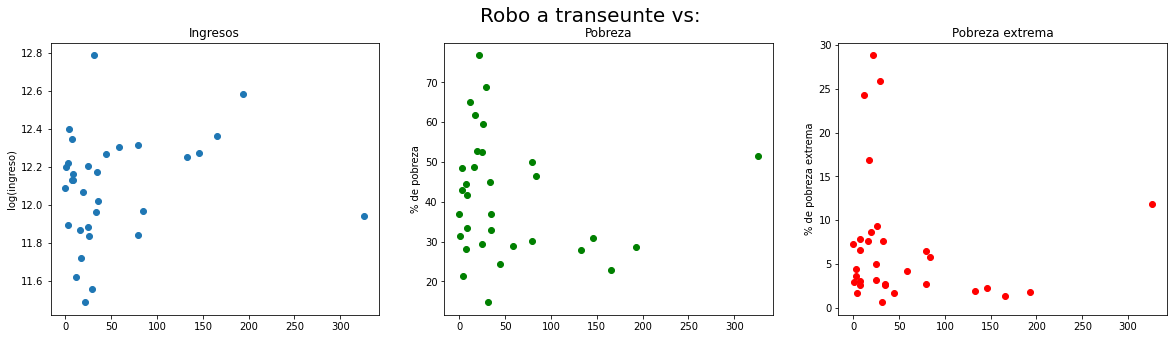

In [94]:
plt.subplot(1,3,1)
plt.scatter(bdprom["tasa_rcalle"],np.log(bdprom["ingreso"]))
plt.ylabel("log(ingreso)")
plt.title("Ingresos")
plt.subplot(1,3,2)
plt.scatter(bdprom["tasa_rcalle"],bdprom["pobreza"],color="g")
plt.ylabel("% de pobreza")
plt.title("Pobreza")
plt.subplot(1,3,3)
plt.scatter(bdprom["tasa_rcalle"],bdprom["pob_ext"],color="r")
plt.ylabel("% de pobreza extrema")
plt.title("Pobreza extrema")

plt.suptitle("Robo a transeunte vs:",fontsize=20)
plt.show()

A simple vista se identifica una relación positiva entre el robo a transeúnte y el nivel de ingreso promedio. Sin embargo, la relación no es del todo clara con pobreza y pobreza extrema

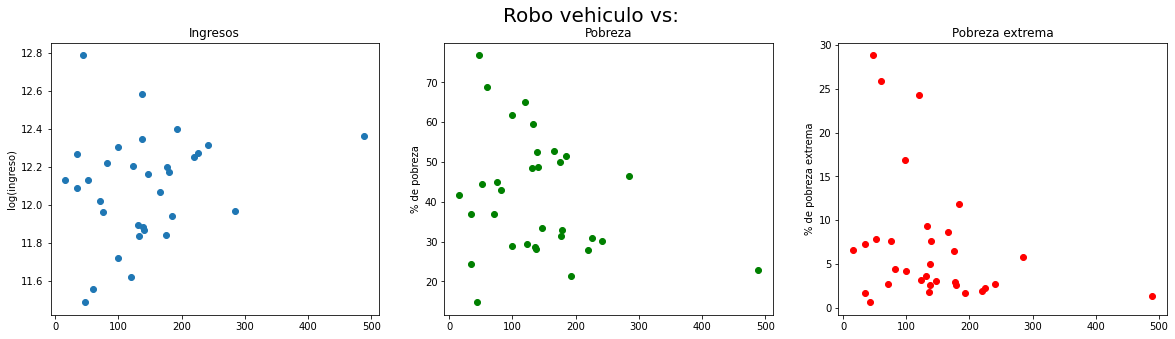

In [95]:
plt.subplot(1,3,1)
plt.scatter(bdprom["tasa_rcarro"],np.log(bdprom["ingreso"]))
plt.ylabel("log(ingreso)")
plt.title("Ingresos")
plt.subplot(1,3,2)
plt.scatter(bdprom["tasa_rcarro"],bdprom["pobreza"],color="g")
plt.ylabel("% de pobreza")
plt.title("Pobreza")
plt.subplot(1,3,3)
plt.scatter(bdprom["tasa_rcarro"],bdprom["pob_ext"],color="r")
plt.ylabel("% de pobreza extrema")
plt.title("Pobreza extrema")

plt.suptitle("Robo vehiculo vs:",fontsize=20)
plt.show()

En cuanto al robo de vehículo, a simple vista se observa una relación positiva con el nivel de ingresos promedio, y negativa con el porcentaje de pobreza y pobreza extrema

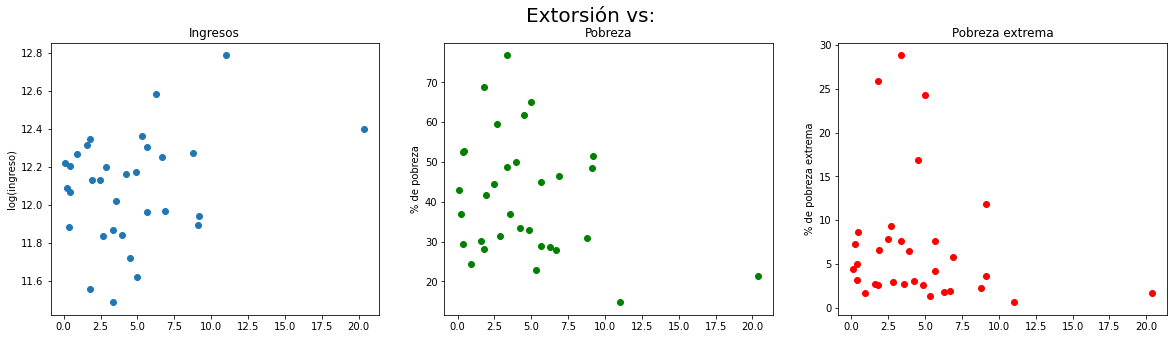

In [96]:
plt.subplot(1,3,1)
plt.scatter(bdprom["tasa_extor"],np.log(bdprom["ingreso"]))
plt.ylabel("log(ingreso)")
plt.title("Ingresos")
plt.subplot(1,3,2)
plt.scatter(bdprom["tasa_extor"],bdprom["pobreza"],color="g")
plt.ylabel("% de pobreza")
plt.title("Pobreza")
plt.subplot(1,3,3)
plt.scatter(bdprom["tasa_extor"],bdprom["pob_ext"],color="r")
plt.ylabel("% de pobreza extrema")
plt.title("Pobreza extrema")

plt.suptitle("Extorsión vs:",fontsize=20)
plt.show()

De manera similar, a simple vista se identifica una posible relación positiva entre la tasa de incidencia de extorsión por cada 100 mil habitantes y el ingreso promedio. En sentido contrario, la pobreza y la pobreza extrema parecen tener una relación negativa con la incidencia de extorsión.


El análisis anterior ("a simple vista") puede robustecerse a través del cálculo de la **matriz de correlación**. Las entradas de la matriz cercanas a 1 (-1) nos indican una correlación fuerte y positiva (negativa). Un valor del coeficiente cercano a cero, indica lo contrario.

In [105]:
bdprom.corr()

,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
tasa_hom,1.000000,0.329604,-0.078550,0.360948,0.088229,-0.066122,0.071992,-0.002613
tasa_rcasa,0.329604,1.000000,0.252246,0.525112,0.499346,0.351012,-0.437811,-0.529621
tasa_rcalle,-0.078550,0.252246,1.000000,0.487491,0.273541,0.182228,-0.112894,-0.141287
tasa_rcarro,0.360948,0.525112,0.487491,1.000000,0.257767,0.147220,-0.306711,-0.264225
tasa_extor,0.088229,0.499346,0.273541,0.257767,1.000000,0.330738,-0.175935,-0.294285
ingreso,-0.066122,0.351012,0.182228,0.147220,0.330738,1.000000,-0.714187,-0.883931
pob_ext,0.071992,-0.437811,-0.112894,-0.306711,-0.175935,-0.714187,1.000000,0.872116
pobreza,-0.002613,-0.529621,-0.141287,-0.264225,-0.294285,-0.883931,0.872116,1.000000


Para visualizar con mayor claridad, generamos un **gráfico con mapa de calor donde un color rojo (azul) más intenso muestra una correlación fuerte positiva (negativa)**.

Como se puede observar, no se identifica una correlación fuerte entre la tasa de homicidio y las variables de ingreso y pobreza. En todo caso, la incidencia del robo a casa-habitación parecería tener una relación ligeramente negativa con el nivel de pobreza.

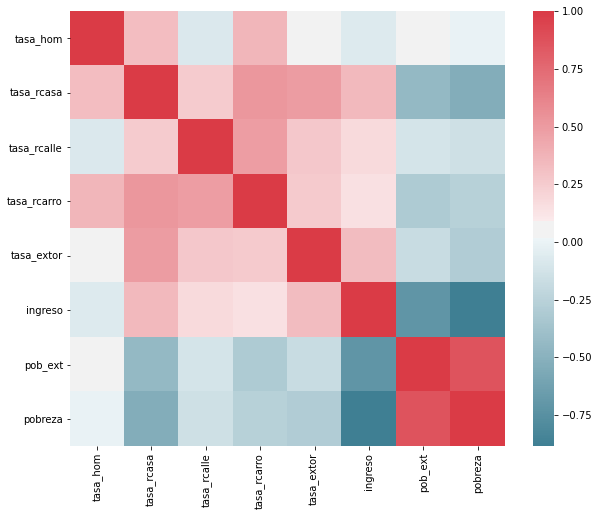

In [109]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = bdprom.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)

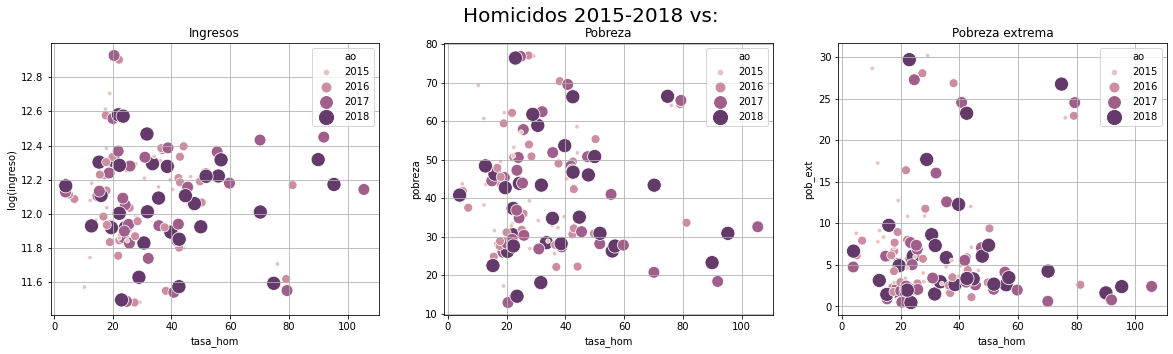

In [142]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_hom"], y=np.log(bd_cbp["ingreso"]),
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.ylabel("log(ingreso)")
plt.title("Ingresos")

plt.subplot(1,3,2)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_hom"], y=bd_cbp["pobreza"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza")

plt.subplot(1,3,3)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_hom"], y=bd_cbp["pob_ext"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza extrema")

plt.suptitle("Homicidos 2015-2018 vs:",fontsize=20)
plt.show()

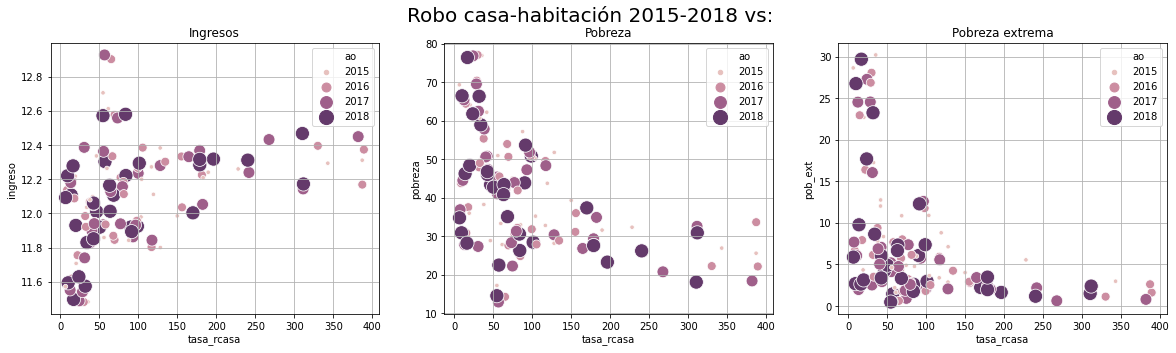

In [143]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcasa"], y=np.log(bd_cbp["ingreso"]),
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Ingresos")

plt.subplot(1,3,2)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcasa"], y=bd_cbp["pobreza"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza")

plt.subplot(1,3,3)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcasa"], y=bd_cbp["pob_ext"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza extrema")

plt.suptitle("Robo casa-habitación 2015-2018 vs:",fontsize=20)
plt.show()

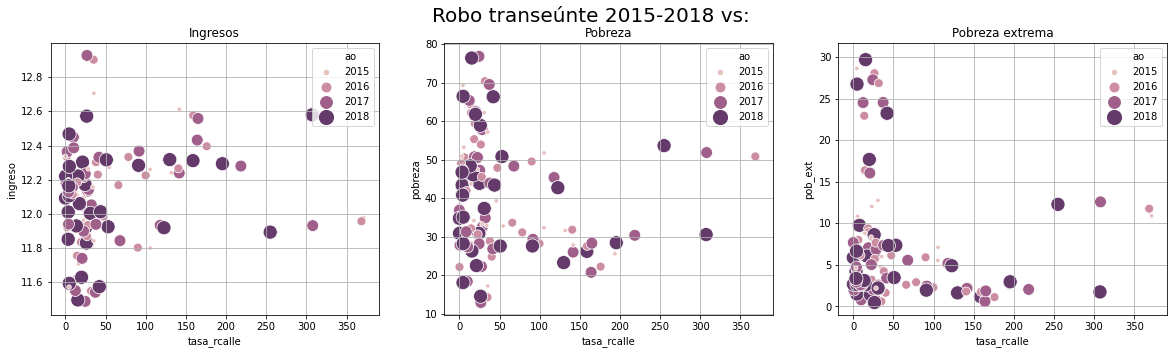

In [144]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcalle"], y=np.log(bd_cbp["ingreso"]),
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Ingresos")

plt.subplot(1,3,2)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcalle"], y=bd_cbp["pobreza"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza")

plt.subplot(1,3,3)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcalle"], y=bd_cbp["pob_ext"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza extrema")

plt.suptitle("Robo transeúnte 2015-2018 vs:",fontsize=20)
plt.show()

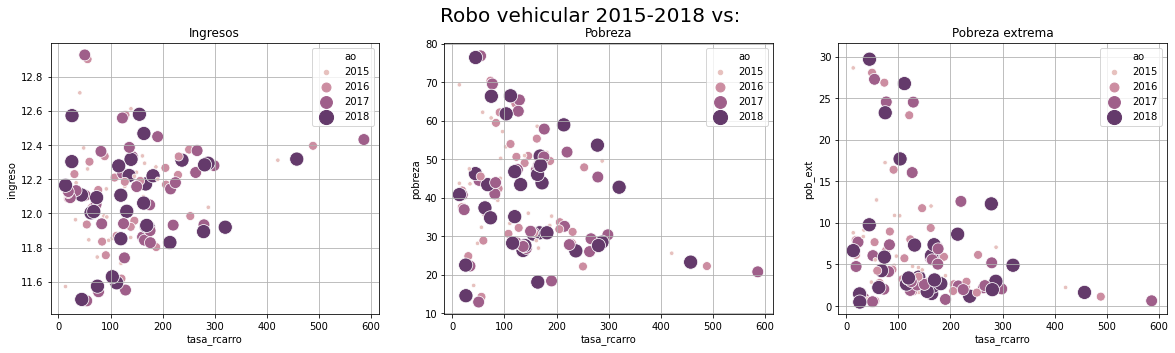

In [145]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcarro"], y=np.log(bd_cbp["ingreso"]),
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Ingresos")

plt.subplot(1,3,2)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcarro"], y=bd_cbp["pobreza"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza")

plt.subplot(1,3,3)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_rcarro"], y=bd_cbp["pob_ext"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza extrema")

plt.suptitle("Robo vehicular 2015-2018 vs:",fontsize=20)
plt.show()

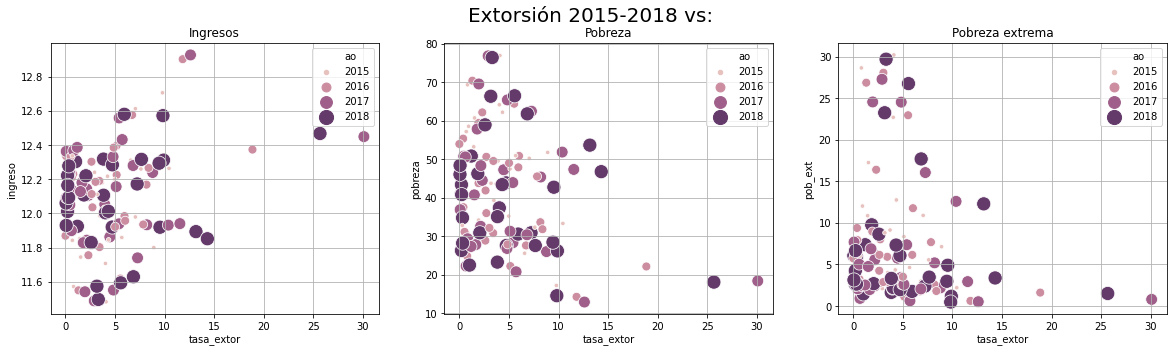

In [146]:
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_extor"], y=np.log(bd_cbp["ingreso"]),
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Ingresos")

plt.subplot(1,3,2)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_extor"], y=bd_cbp["pobreza"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza")

plt.subplot(1,3,3)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x=bd_cbp["tasa_extor"], y=bd_cbp["pob_ext"],
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=bd_cbp)
plt.grid(True)
plt.title("Pobreza extrema")

plt.suptitle("Extorsión 2015-2018 vs:",fontsize=20)
plt.show()

Y para el total de los datos (incluyendo los años 2015-2018), tenemos la matriz de correlación:

In [104]:
bd_cbp.corr()

,ao,clave_ent,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
ao,1.000000,0.000000,0.223696,-0.035318,0.020689,0.146643,0.115479,-0.008960,-0.068031,-0.085919
clave_ent,0.000000,1.000000,-0.182055,-0.445257,-0.114571,-0.218151,-0.120830,-0.212263,0.079704,0.245553
tasa_hom,0.223696,-0.182055,1.000000,0.291607,-0.059137,0.352213,0.153075,-0.058521,0.044064,-0.020165
tasa_rcasa,-0.035318,-0.445257,0.291607,1.000000,0.271720,0.493425,0.459362,0.330763,-0.415766,-0.502904
tasa_rcalle,0.020689,-0.114571,-0.059137,0.271720,1.000000,0.455726,0.237260,0.171396,-0.108577,-0.135210
tasa_rcarro,0.146643,-0.218151,0.352213,0.493425,0.455726,1.000000,0.237520,0.144936,-0.301457,-0.263641
tasa_extor,0.115479,-0.120830,0.153075,0.459362,0.237260,0.237520,1.000000,0.300655,-0.159444,-0.273353
ingreso,-0.008960,-0.212263,-0.058521,0.330763,0.171396,0.144936,0.300655,1.000000,-0.689606,-0.859067
pob_ext,-0.068031,0.079704,0.044064,-0.415766,-0.108577,-0.301457,-0.159444,-0.689606,1.000000,0.868601
pobreza,-0.085919,0.245553,-0.020165,-0.502904,-0.135210,-0.263641,-0.273353,-0.859067,0.868601,1.000000


Y su respectivo gráfico de calor para mejor visualización:

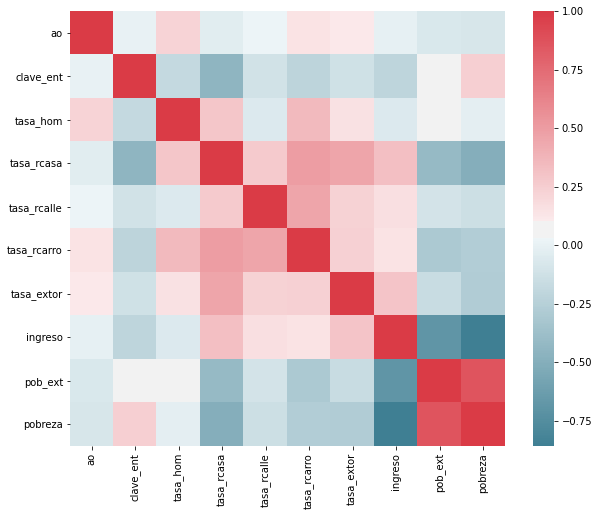

In [110]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = bd_cbp.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)